In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

AUTOTUNE = tf.data.experimental.AUTOTUNE


In [14]:
def load_data():
    BATCH_SIZE = 32
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

    PATH = '/Users/florianmerkle/tensorflow_datasets/downloads/extracted/TAR_GZ.s3_fast-ai-imageclas_imagenetteG9ZQvBaITKiOTw9TfthWmx-Neuhl0366js3YfZzZ3Po.tgz/imagenette/train'
    data_dir = pathlib.Path(PATH)
    CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if (item.name != "LICENSE.txt" and item.name != '.DS_Store')])
    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         classes = list(CLASS_NAMES))
    return(data_gen)


In [17]:
data_gen = load_data()
data_gen

Found 12894 images belonging to 10 classes.


b'/Users/florianmerkle/tensorflow_datasets/downloads/extracted/TAR_GZ.s3_fast-ai-imageclas_imagenetteG9ZQvBaITKiOTw9TfthWmx-Neuhl0366js3YfZzZ3Po.tgz/imagenette/train/truck/n03417042_23468.JPEG'
b'/Users/florianmerkle/tensorflow_datasets/downloads/extracted/TAR_GZ.s3_fast-ai-imageclas_imagenetteG9ZQvBaITKiOTw9TfthWmx-Neuhl0366js3YfZzZ3Po.tgz/imagenette/train/truck/n03417042_975.JPEG'
b'/Users/florianmerkle/tensorflow_datasets/downloads/extracted/TAR_GZ.s3_fast-ai-imageclas_imagenetteG9ZQvBaITKiOTw9TfthWmx-Neuhl0366js3YfZzZ3Po.tgz/imagenette/train/church/n03028079_13116.JPEG'
b'/Users/florianmerkle/tensorflow_datasets/downloads/extracted/TAR_GZ.s3_fast-ai-imageclas_imagenetteG9ZQvBaITKiOTw9TfthWmx-Neuhl0366js3YfZzZ3Po.tgz/imagenette/train/truck/n03417042_12908.JPEG'
b'/Users/florianmerkle/tensorflow_datasets/downloads/extracted/TAR_GZ.s3_fast-ai-imageclas_imagenetteG9ZQvBaITKiOTw9TfthWmx-Neuhl0366js3YfZzZ3Po.tgz/imagenette/train/chain_saw/n03000684_16026.JPEG'


In [54]:

def create_data_set(PATH):    
    data_dir = pathlib.Path(PATH)
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    
    def get_label(file_path):
        # convert the path to a list of path components
        
        parts = tf.strings.split(file_path, os.path.sep)
        print(parts[-2])
        # The second to last is the class-directory
        return parts[-2] == CLASS_NAMES

    def decode_img(img):
        # convert the compressed string to a 3D uint8 tensor
        img = tf.image.decode_jpeg(img, channels=3)
        # Use `convert_image_dtype` to convert to floats in the [0,1] range.
        img = tf.image.convert_image_dtype(img, tf.float32)
        # resize the image to the desired size.
        return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

    def process_path(file_path):
        print('file_path', file_path)
        label = get_label(file_path)
        # load the raw data from the file as a string
        img = tf.io.read_file(file_path)
        img = decode_img(img)
        return img, label
    
    list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
    labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
    
PATH = '/Users/florianmerkle/tensorflow_datasets/downloads/extracted/TAR_GZ.s3_fast-ai-imageclas_imagenetteG9ZQvBaITKiOTw9TfthWmx-Neuhl0366js3YfZzZ3Po.tgz/imagenette/train'
create_data_set(PATH)

file_path Tensor("args_0:0", shape=(), dtype=string)
Tensor("strided_slice:0", shape=(), dtype=string)


In [53]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [False False False False  True False False False False False]


In [3]:
image_count = len(list(data_dir.glob('**/*.JPEG')))
image_count

12894

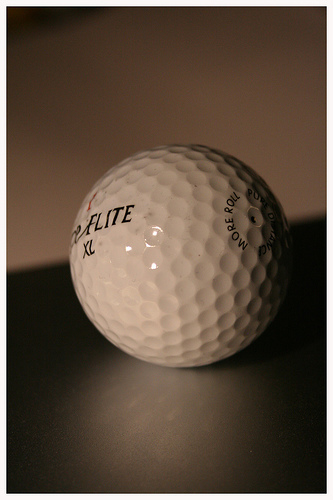

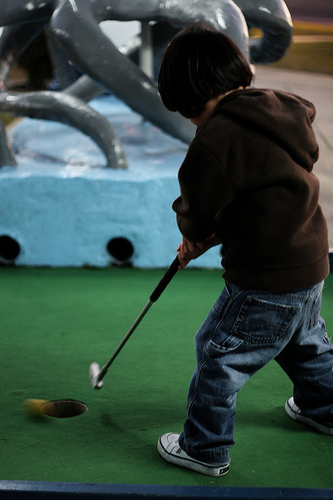

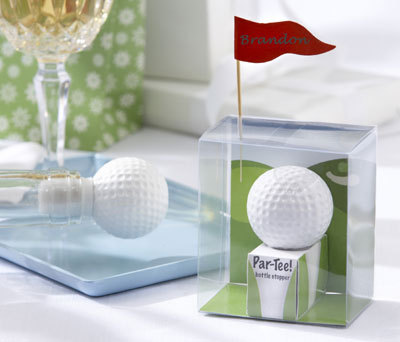

In [12]:
roses = list(data_dir.glob('golfball/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

In [9]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

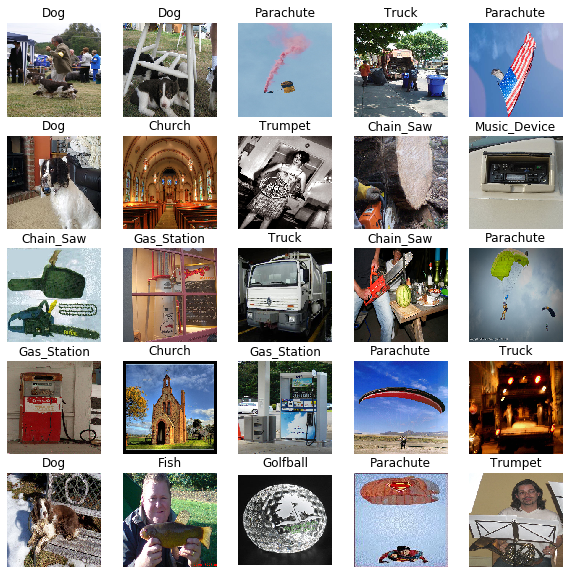

In [10]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)